<h1 style="font-size:3em; color:black;"> Credit Limit Prescriptor</h1>

In [70]:
# Importing naumpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd


# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

#Widgets for the form
import ipywidgets as widgets

#scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Read the given CSV file, and view some sample records
credit = pd.read_csv("Data/BankChurners.csv")

credit_filtered = credit.loc[credit["Avg_Utilization_Ratio"] >.6]

a = credit_filtered.drop("Months_on_book", axis=1).drop("Avg_Open_To_Buy", axis=1).drop("Attrition_Flag", axis=1).drop("Total_Trans_Ct", axis=1).drop("Total_Relationship_Count", axis=1).drop("Total_Ct_Chng_Q4_Q1", axis=1).drop("Total_Amt_Chng_Q4_Q1", axis=1).drop("Total_Trans_Amt", axis=1).drop("Contacts_Count_12_mon", axis=1).drop("Months_Inactive_12_mon", axis=1).drop("Credit_Limit", axis=1).drop("CLIENTNUM", axis=1).drop("Card_Category", axis=1).drop("Avg_Utilization_Ratio", axis=1)

b = credit_filtered["Credit_Limit"]

# Prepare numerical data
numeric_features = ["Customer_Age", "Total_Revolving_Bal"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Encode Categories
categorical_features = ["Gender", "Dependent_count", "Education_Level", "Marital_Status", "Income_Category"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Process Data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", RandomForestRegressor(n_estimators=1000))]
)

#Splitting data and fitting
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size =0.2)

clf.fit(a_train, b_train)

from IPython.display import HTML

HTML('''<script>
    var code_show = true; 
    function code_toggle() {
         if (code_show) {
             $( 'div[class*="code_cell"]:not(:has(.output))' ).hide();
             $( 'div.input' ).hide();
         } else {
             $( 'div[class*="code_cell"]:not(:has(.output))' ).show();
             $( 'div.input' ).show();
         }
         code_show = !code_show;
    } 
    $( document ).ready(code_toggle);
    </script>
    Code is hidden to help visibility, click here to see code. <a href="javascript:code_toggle()">here</a>.''')


#Evaluation Code
# scores = cross_val_score(clf, a, b, cv=5)
# print("The scores on the split data are ")
# print(scores)
# print("The average score is " + str(np.mean(scores)))
# print("The ML Estimator Score is " + str((clf.score(a_test, b_test))))


# Data Demographics

This section contains visual aids that give insight to the customers' demographics. These can be used for analysis of the data gathered from Wells Fargo clients.The data presented here correlates with customers who have a high credit limit utilization.(This is defined to be 60% or more)

### Customer Gender

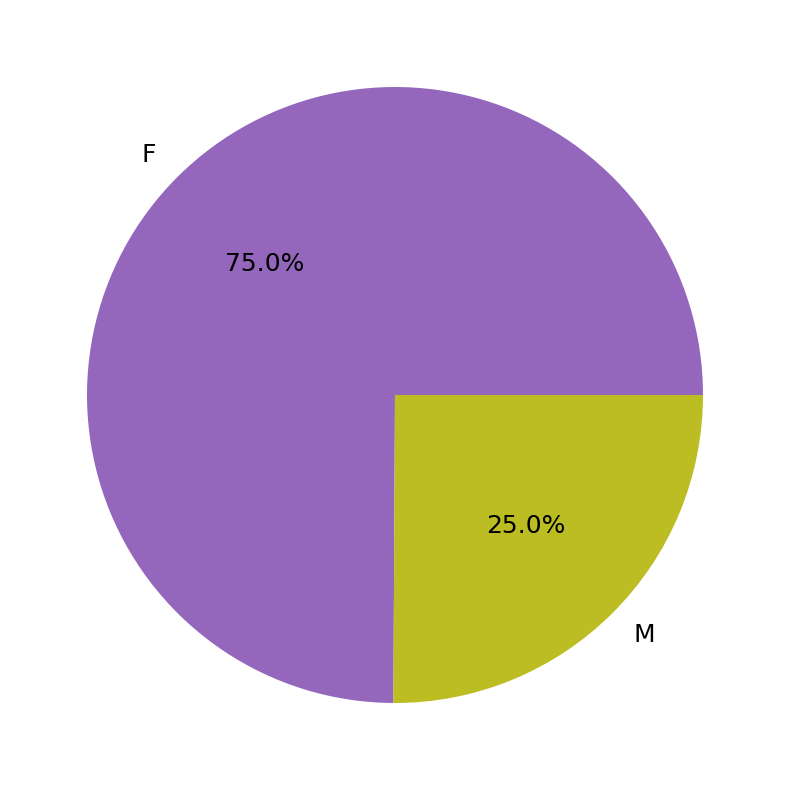

In [71]:
genderPlot = (a.apply(lambda s: s.value_counts())).plot.pie(y='Gender', figsize=(10,10), legend=False, label="", autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '', subplots=True, fontsize=18)

### Customer Education

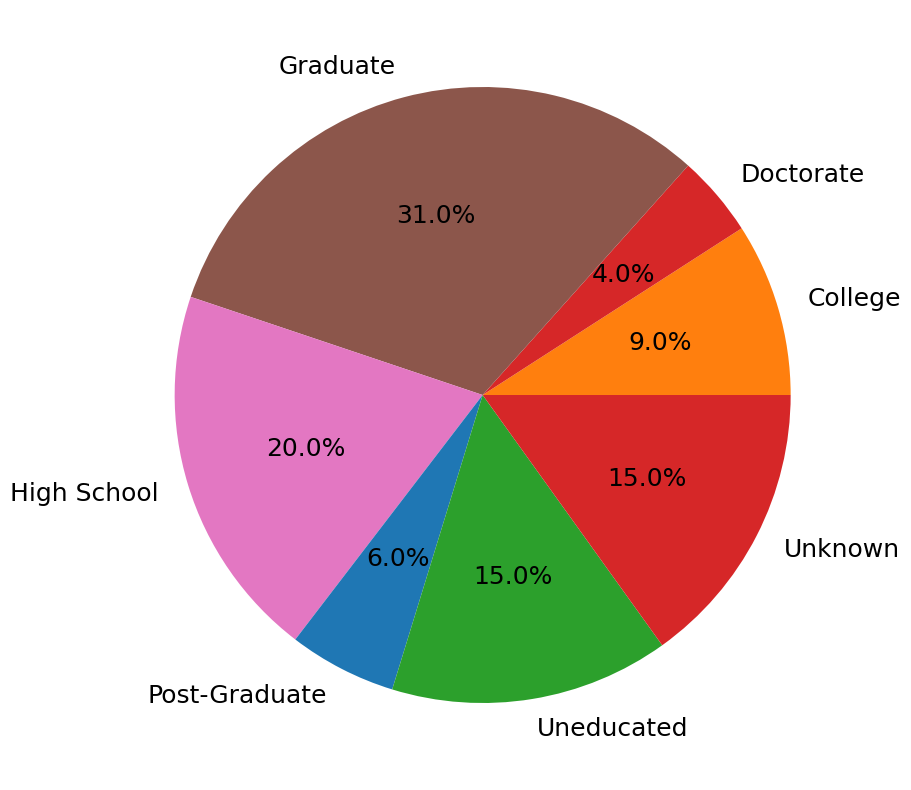

In [72]:
educationPlot = (a.apply(lambda s: s.value_counts())).plot.pie(y='Education_Level', figsize=(10,10), legend=False, label="", autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '', subplots=True, fontsize=18)

### Customer Income Bracket

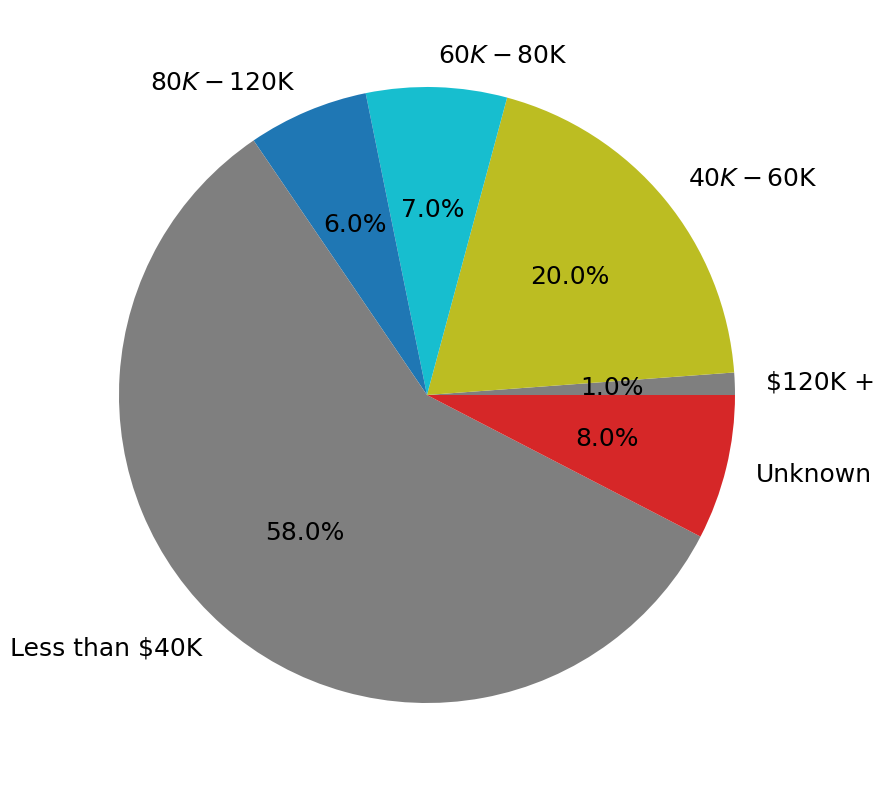

In [73]:
educationPlot = (a.apply(lambda s: s.value_counts())).plot.pie(y='Income_Category', figsize=(10,10), legend=False, label="", autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '', subplots=True, fontsize=18)

### Customer's Number of Dependents

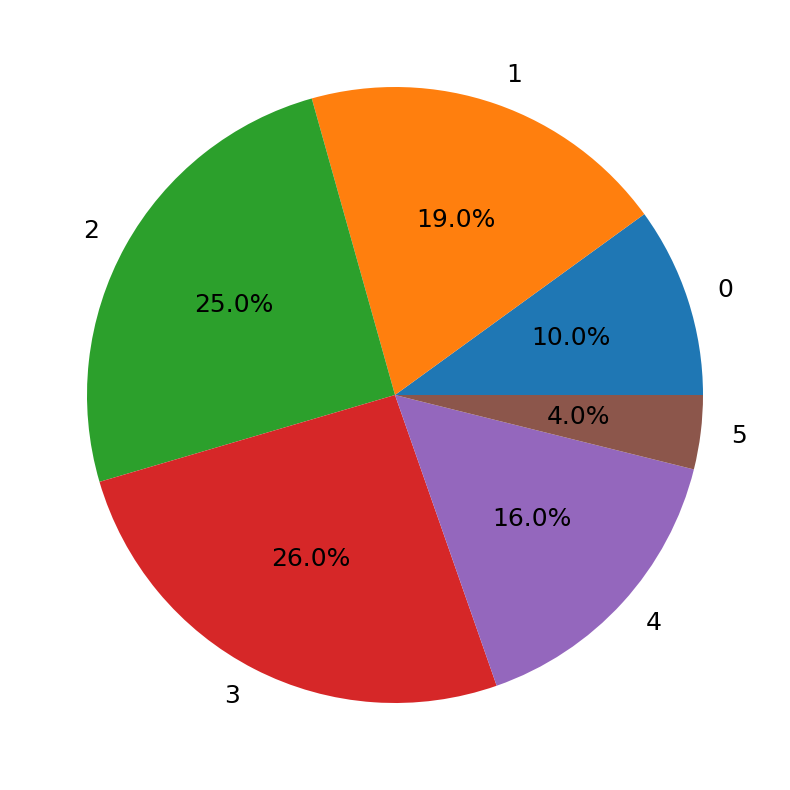

In [74]:
dependentPlot = (a.apply(lambda s: s.value_counts())).plot.pie(y='Dependent_count', figsize=(10,10), legend=False, label="", autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '', subplots=True, fontsize=18)

### Customer Marital Status

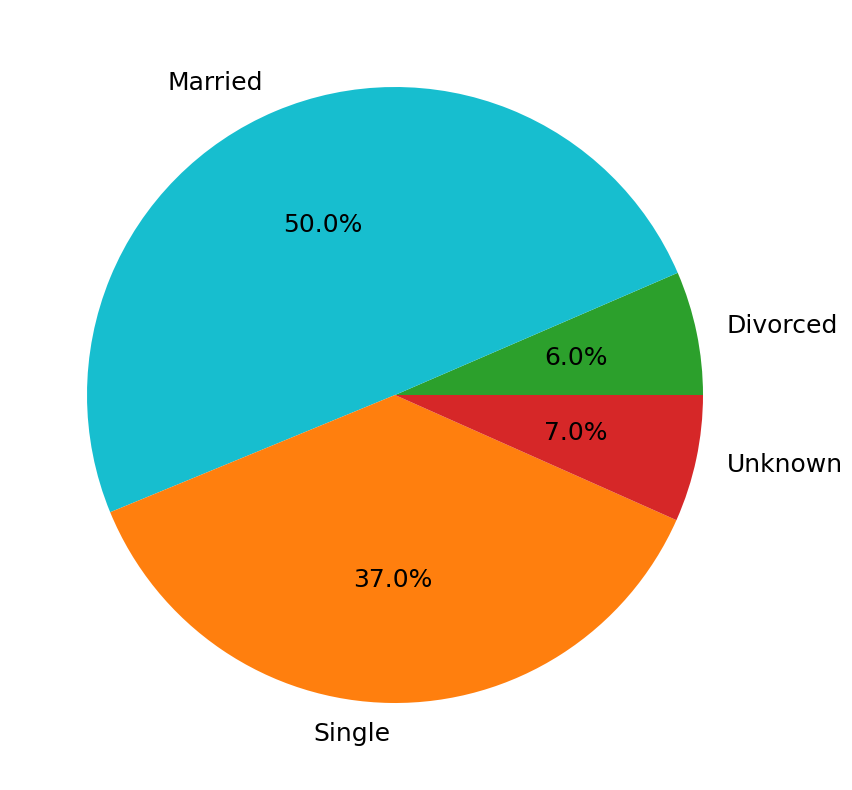

In [75]:
maritalPlot = (a.apply(lambda s: s.value_counts())).plot.pie(y='Marital_Status', figsize=(10,10), legend=False, label="", autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '', subplots=True, fontsize=18)

## Customer Form

The following form is to be completed by a bank creditor. They will collect a customer's information and fill out the form accordingly. After processing is done, this application will return a prescription of a new credit limit personalized to the customer's data.

#### Customer Age

In [76]:
age = widgets.Text(
    value='',
    disabled=False
)
age

Text(value='')

#### Customer Gender

In [77]:
gender = widgets.Dropdown(
    options=[('Male', 'M'), ('Female', 'F'),],

)
gender

Dropdown(options=(('Male', 'M'), ('Female', 'F')), value='M')

#### Customer Dependent Count

In [78]:
dependents = widgets.Text(
    value='',
    disabled=False
)
dependents

Text(value='')

#### Customer Education

In [79]:
education = widgets.Dropdown(
    options=["Graduate", "Doctorate", "College", "Uneducated", "Post-Graduate", "High School"],
)
education

Dropdown(options=('Graduate', 'Doctorate', 'College', 'Uneducated', 'Post-Graduate', 'High School'), value='Gr…

#### Customer Income Bracket

In [80]:
income = widgets.Dropdown(
    options=["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"],
)
income

Dropdown(options=('Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'), value='Less than…

#### Customer Marital Status

In [81]:
marital = widgets.Dropdown(
    options=["Single", "Married", "Divorced"],
)
marital

Dropdown(options=('Single', 'Married', 'Divorced'), value='Single')

#### Customer Debt

In [82]:
debt = widgets.Text(
    value='',
    disabled=False
)
debt

Text(value='')

In [84]:
from IPython.display import display
button = widgets.Button(description="Submit Form")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        x_test = pd.DataFrame({"Gender":gender.value, "Customer_Age":int(age.value),
                               "Dependent_count":dependents.value, "Education_Level":education.value, 
                               "Marital_Status":marital.value, "Income_Category":income.value, 
                               "Total_Revolving_Bal":float(debt.value) }, index = [0])
        print("This client's new credit limit should be $" + format(clf.predict(x_test)[0], ',.2f') + ".")

button.on_click(on_button_clicked)



Button(description='Submit Form', style=ButtonStyle())

Output()